<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_ch8_1~3_pg_466~486.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽 가이드 ch8. 1 ~ 3 pg. 466 ~ 486

## 1. 텍스트 분석의 이해

- 머신러닝 알고리즘: 숫자형의 피처 기반 데이터만 입력받을수 있음-> 텍스트 머신러닝 적용 위해 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출돈 피처에 의미있는 값을 부여하는가 하는 것이 중요

-텍스트를 워드 기반 피처로 추출, 이 피처에 단어 빈도수같은 숫자 값 부여시 텍스트는 단어의 조합인 벡터값으로 표현 가능 : 피처 벡터화 (피처 추출)

: Word2Vec / BOW

- BOW

- 텍스트 분석 수행 프로세스 :

1) 텍스트 사전 준비 (전처리)
2) 피처 벡터화/추출
3) ML 모델 수립 및 학습/예측/평가

-파이썬 기반 NLP, 텍스트 분석 패키지 : NTLK, Gensim, SpaCy


## 2. 텍스트 사전 준비 작업 (텍스트 전처리) - 텍스트 정규화

텍스트 정규화 : 클렌징, 토큰화(토큰단위분리, 마지막 기호따라 분리), 필터링/스톱워드제거/철자수정, stemming, lemmatization

In [3]:
#문장 토큰화 : 마침표, 개행문자 등 마지막 뜻하는 기호에 따라 분리
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text=text_sample)
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#단어 토큰화 : 문장을 단어로 토큰화 word_tokenize() 이용 (' ', ',','.')
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."

words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [4]:
#조합해 문서에 대해 모든 단어 토큰화
from nltk import word_tokenize, sent_tokenize

# 여러개의 문장으로된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성
def tokenize_text(text):

    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    #분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

# 여러 문장에 대해 문장별 단어 토큰화 수행
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

#문장 단어별 하나씩 토큰화-> 문맥적 의미 무시 ->n_gram

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


- 스톱 워드 제거

스톱 워드: 분석에 큰 의미 없는 단어 (is, the, a will) : NTLK 언어별 제공

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
print('영어 stop words 갯수:',len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [7]:
#stopwords를 필터링으로 제거해 의미있는 단어만 추출해보자
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
# 위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    # 개별 문장별로 토큰화된 문장 list에 대해 스톱워드를 제거하는 반복문
    for word in sentence:
        # 소문자로 모두 변환합니다.
        word = word.lower()
        # 토큰화된 개별 단어가 스톱워드의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


- is, this 제거된거 확인 가능

- Stemming(일부 철자 훼손된 어근 단어 추출 경향 존재) 과 Lemmatization(더 정확) : 원형 단어 찾기

- NLTK : Stemmer(Porter, Lancaster, Snowball Stemmer), Lemmatization(WordNetLemmatizer)

- Stemmer : 진행형, 3인칭 단수, 과거형에 따른 동사, 비교, 최상에 따른 형용사의 변화에 따라 원형 단어 찾아줌

In [8]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [9]:
# 진행형, 3인칭 단수, 과거형 모두 기본 단어로 인식
#amuse의 amus를 우너형으로 인식 : 오류
# Lemmatization 수행

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()

print(lemma.lemmatize('amusing', 'v'),lemma.lemmatize('amuses', 'v'),lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'),lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'),lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


## 3. Bag of words - BOW

문서가 갖는 모든 단어를 문맥, 순서 무시하고 일괄적으로 단어에 대해 빈도값 부여해 피처값 추출

My wife likes to watch baseball games and my daughter likes to watch baseball games too

My wife likes to play baseball

-> 단어별 중복 제거 후 칼럼 형태로 나열, 고유 인덱스 부여, 나타나는 횟수 기재

단점 : 문맥 의미 반영 부족, 희소 행렬 문제

- BOW 피처 벡터화

피처 벡터화: 문서의 텍스트를 단어로 추출해 피처로 할당, 각 단어 발생 빈도 값으로 부여해 각 문서를 이 단어 피처의 발생 빈도 값으로 구성된 벡터 만듦

-> 모든 단어 칼럼 형태 나열, 해당 단어 횟수, 정규화된 빈도를 값으로 부여

- 2가지 방법 : 카운트 기반의 벡터화(언어특성상오류가능), TF-IDF 기반 벡터화(자주나타나면 높은 가중치->전반적 자주: 페널티)

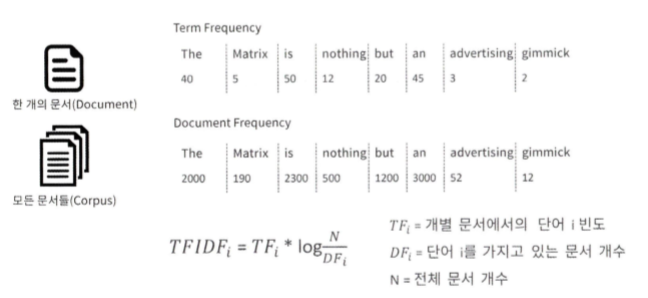

- 사이킷런의 COUNT 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidfVectorizer

카운트 기반 벡터화 구현 클래스 : 소문자 일괄 변환, 토큰화, 스톱워드필터링 등 텍스트 전처리도 함께 수행

countvectorizer : 입력 파라미터 : max_df, min_df, max_features, stop_words, n_gram_range, analyzer, token_pattern, tokenizer

1) 영어 모두 소문자로 변경

2) 디폴트로 단어 기준 n_gram_range 반영해 각 단어 토큰화

3) 텍스트 정규화 수행

4) 토큰화된 단어를 피처로 추출, 단어 빈도수 벡터값 적용 : 피처 벡터화

- BOW 벡터화를 위한 희소 행렬

BOW 형태 가진 언어모데르이 피처 벡터화 : 대부분 희소행렬 (불필요한 0값 할당, 메모리 공간 많이 필요, 시간 많이 소모) -> COO 형식, CSR 형식 으로 저장 및 계산 수행

희소 행렬 - COO 형식 : 0이 아닌 데이터만 별도의 배열에 저장, 그 행/열 위치를 별도 배열로 저장

사이파이 SPARSE 패키지 이용

In [10]:
import numpy as np

dense = np.array([[3, 0, 1], [0, 2, 0]])

from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3, 1, 2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0, 0, 1])
col_pos = np.array([0, 2, 1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [12]:
#밀집 형태 행렬로 출력
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

희소 행렬 - CSR 형식

행열 위치 나타내기 위해 반복적인 위치 데이터 사용해야한다는 COO의 문제 해결한 방식

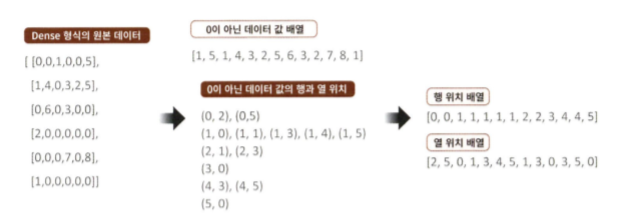

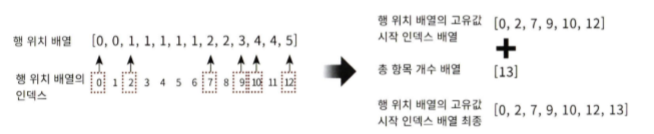

- CSR : 행 위치 배열 내에 있는 고유한 값의 시작위치만 다시 별도의 위치 배열로 가지는 변환 방식 (csr_matrix 클래스 이용)

In [14]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

# 0 이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값들의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인\n')
print(sparse_coo.toarray())
print('\n')
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인\n')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인

[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


COO, CSR 희소 행렬 메모리 줄이는 법

-실제 사용시 밀집 행렬을 생성파라미터로 입력시 COO, CSR등 희소 행렬로 생성

CountVectorizer, TfidfVectorizer 클래스로 변환된 피처 벡터화 행렬은 모두 사이파이의 csr 형태의 희소 행렬

In [16]:
#실제 사용시 예시
dense3 = np.array([[0,0,1,0,0,5],
                  [1,4,0,3,2,5],
                  [0,6,0,3,0,0],
                  [2,0,0,0,0,0],
                  [0,0,0,7,0,8],
                  [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)